In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's s*everal helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split


Objectives:
- predicting the likelihood of a patient developing lung cancer
- identifying risk factors for lung cancer
- determining the most effective treatment for a patient with lung cancer

In [10]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

In [11]:
col2drop=["index","Patient Id"]
df=df.drop(col2drop, axis=1)

In [12]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [17]:
#transform age into a categorical feature
def get_age_cat(Age):
    
    if Age <= 25:
        return '1'
    
    elif (Age >25) and (Age <= 50):
        return '2'
    
    elif (Age > 50) & (Age <= 75):
        return '3'
    
    
    
    else:
        return '4'

In [18]:
df['Age'] = df['Age'].apply(get_age_cat)

In [22]:
def plot_histograms(df):
    df.hist(bins=20, figsize=(35, 25), edgecolor='black')
    plt.suptitle('Distribution of Features')
    plt.show()

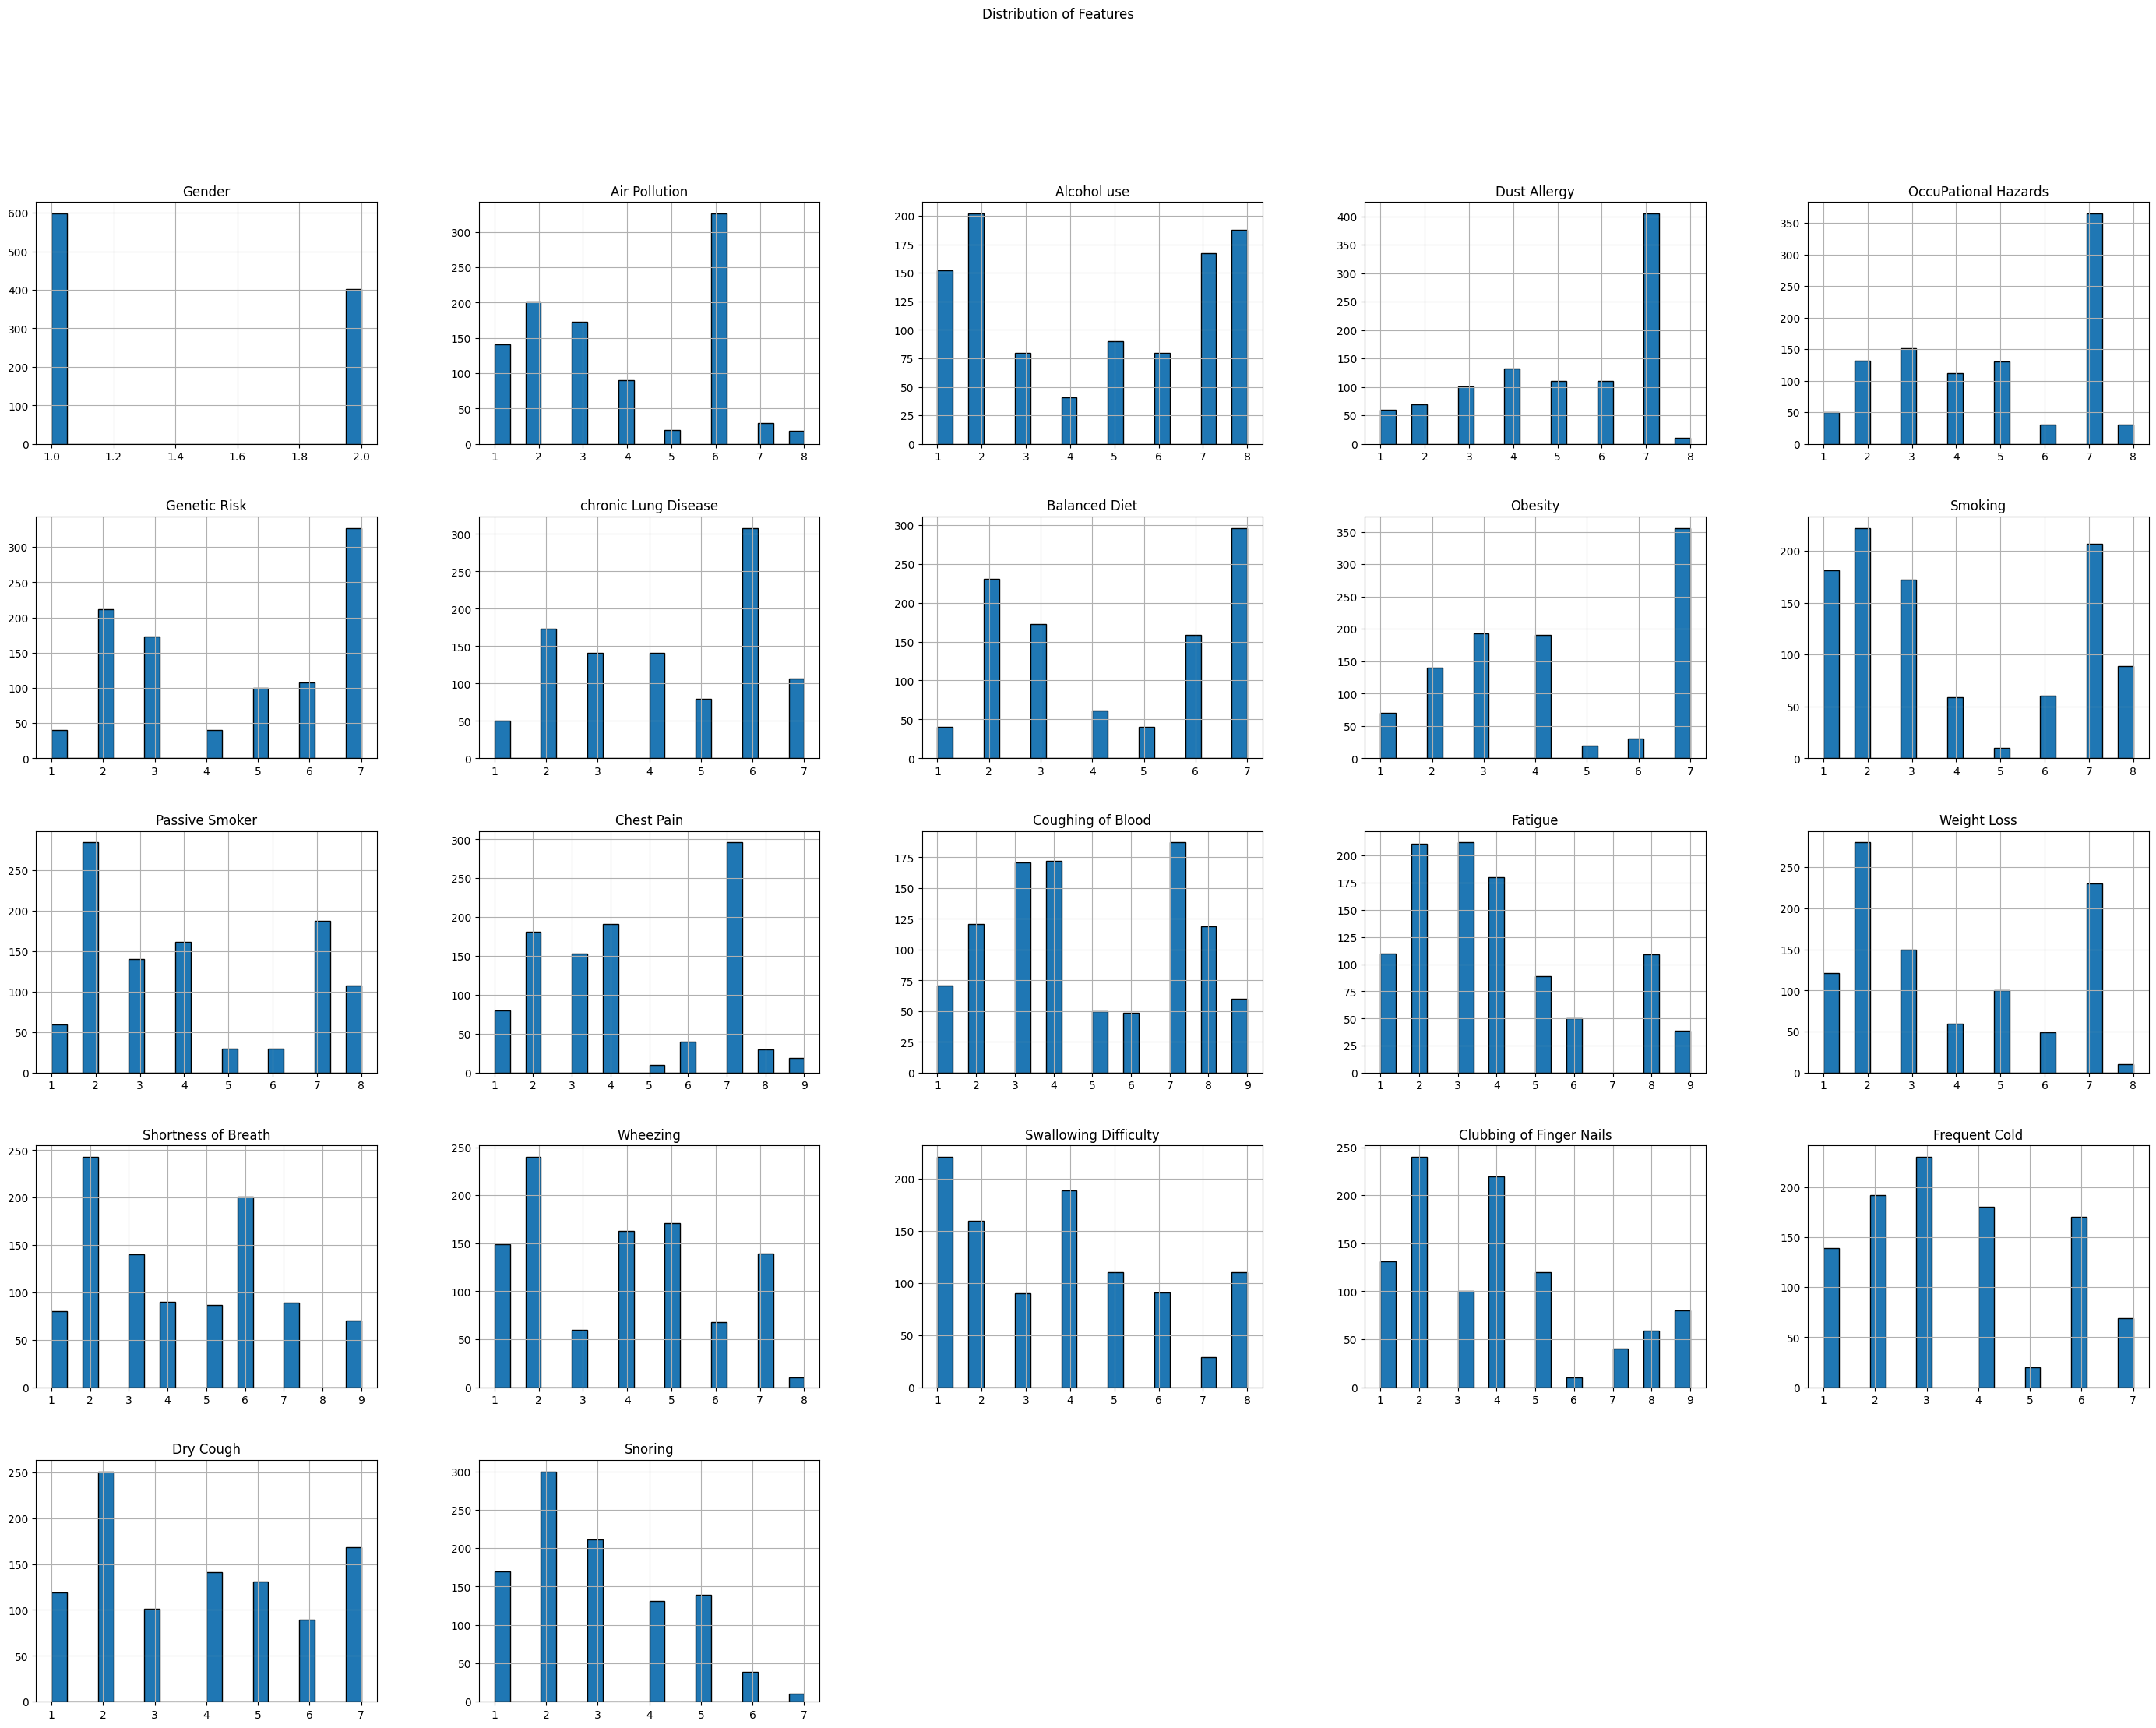

In [23]:
plot_histograms(df)

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X = df.apply(le.fit_transform)
X.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,1,0,1,3,4,3,2,1,1,3,...,2,3,1,1,2,0,1,2,3,1
1,0,0,2,0,4,2,3,1,1,1,...,0,2,6,7,5,1,0,6,1,2
2,1,0,3,4,5,4,4,3,5,6,...,6,6,7,1,0,3,5,6,1,0
3,1,0,6,6,6,6,5,6,6,6,...,3,1,2,0,3,4,5,6,4,0
4,1,0,5,7,6,6,6,5,6,6,...,2,1,3,0,3,1,3,1,2,0


In [28]:
# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X)

# 3. Transform
onehotlabels = enc.transform(X).toarray()
onehotlabels.shape

(1000, 172)

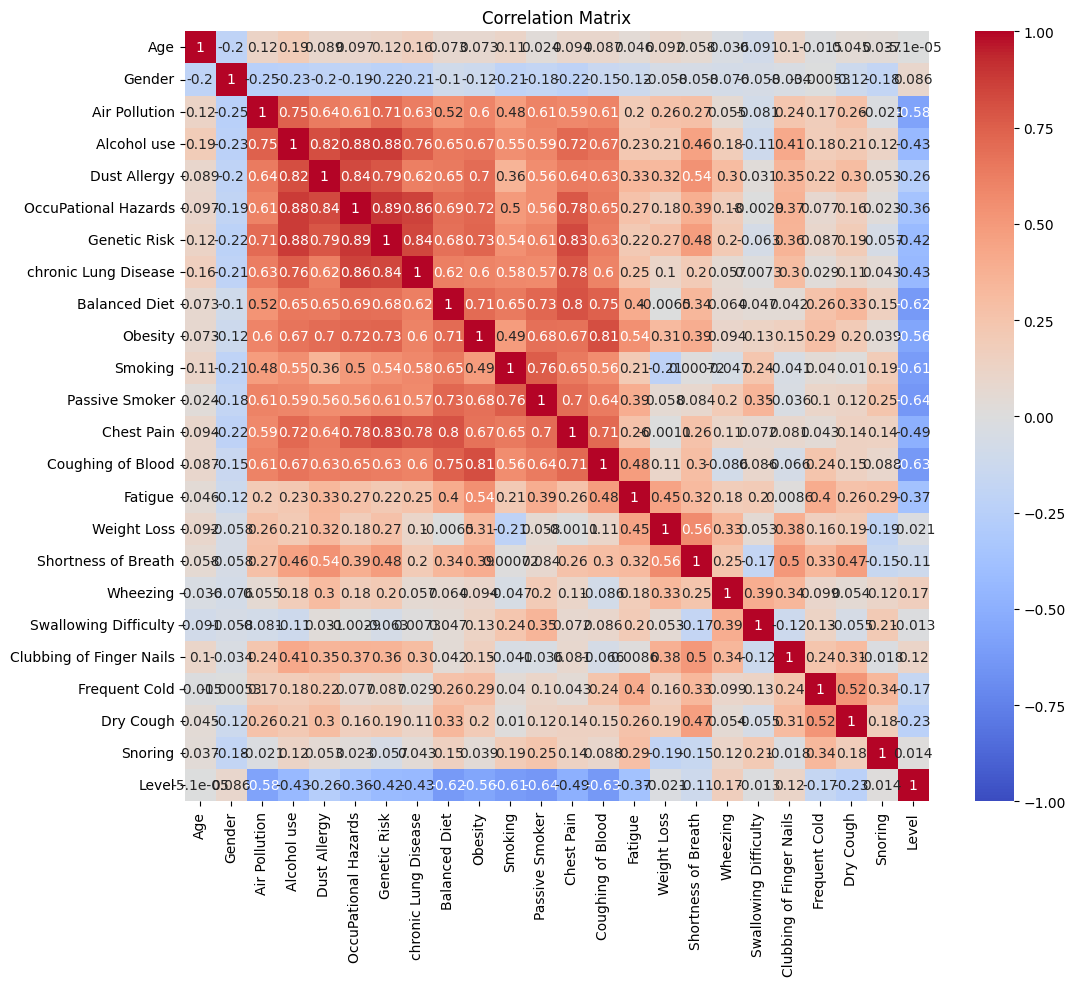

In [29]:
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

I  will not drop any feature here

In [32]:
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

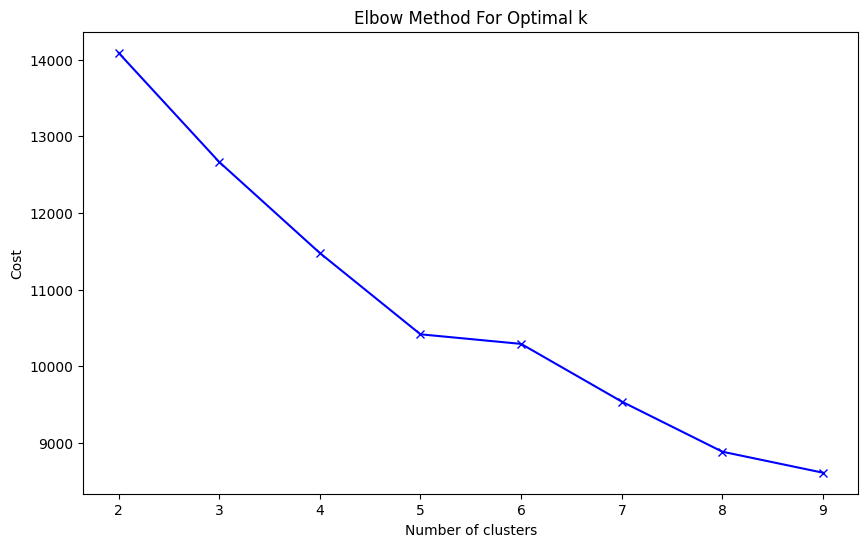

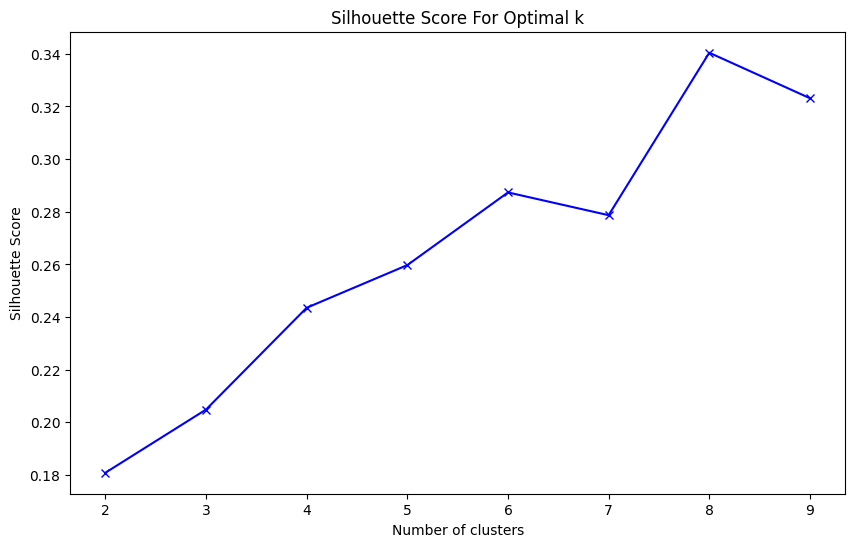

In [34]:
def categorical_silhouette_score(X, labels):
    # Convert dataframe to numpy array if it's not already
    if isinstance(X, pd.DataFrame):
        X = X.to_numpy()
    
    # Calculate silhouette score using Hamming distance
    silhouette_avg = silhouette_score(X, labels, metric='hamming')
    return silhouette_avg

 #Initialize lists to store cost and silhouette scores
cost = []
sil_scores = []  # Changed list name to avoid conflict
K = range(2, 10)

for k in K:
    km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = km.fit_predict(X)
    cost.append(km.cost_)
    sil_score = categorical_silhouette_score(X, clusters)
    sil_scores.append(sil_score)

# Plot the cost for the elbow method
plt.figure(figsize=(10, 6))
plt.plot(K, cost, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K, sil_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal k')
plt.show()

By the elbow method we can see the optimal values for K. The silhouette score helps understand if the Clusters are well defined or not. Other options are also available.

- Silhouette Score: Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The value ranges from -1 to 1, where a higher value indicates better-defined clusters.

- Metrics like the Davies-Bouldin Index or Dunn Index can also be adapted for categorical data clustering evaluation. This is an internal metrics evaluation.


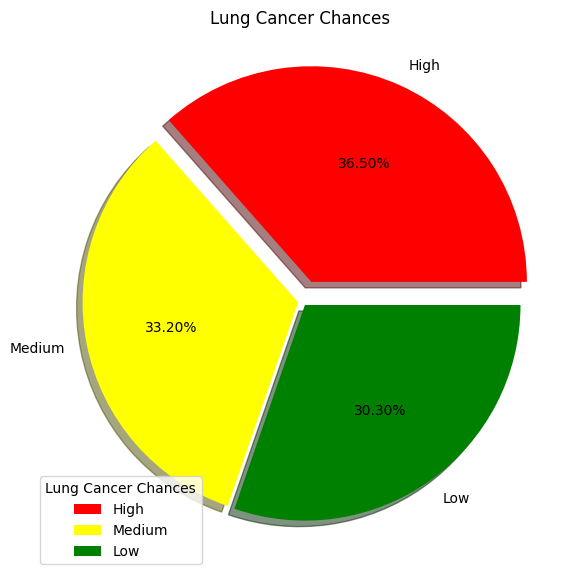

In [36]:
plt.figure(figsize = (15,7))
colors = ['red', 'yellow', 'green']
plt.title("Lung Cancer Chances ")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True, colors = colors)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

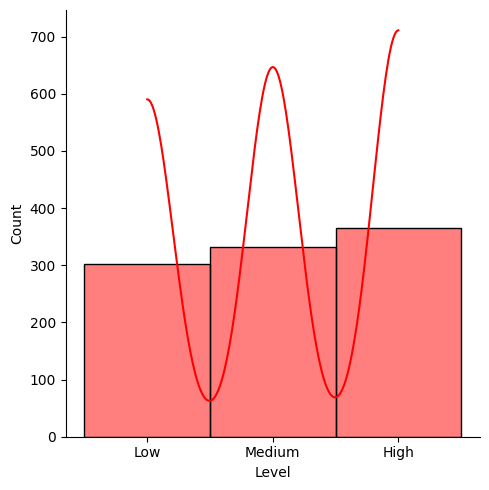

In [37]:
sns.displot(df['Level'], kde=True, color = 'red')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [40]:
X=df.drop('Level',axis=1)
y=df['Level']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV

param_RF = {
    'n_estimators': [50, 100, 150], 
    'max_depth': [2,3,4,5],
    'criterion':['gini'],
    'min_samples_split': [2, 3],  
    'min_samples_leaf': [2, 3],
    'random_state' : [42],
    'max_samples': [0.4]
    
}

In [48]:
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_RF, cv=5)
model.fit(X_train, y_train)

best_params = model.best_params_
print("Best Parameters:", best_params)
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(X_train, y_train)

Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_samples': 0.4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 42}


RandomForestClassifier(max_depth=4, max_samples=0.4, min_samples_leaf=2,
                       n_estimators=50, random_state=42)

In [50]:
y_pred=model_rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       1.00      1.00      1.00        55
      Medium       1.00      1.00      1.00        63

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [51]:
# Feature importance for Random Forest Clasifire
feature_importances_model_rf = pd.DataFrame(X_train.columns)
feature_importances_model_rf.columns = ['feature']
feature_importances_model_rf["score_model_rf"] = pd.Series(model_rf.feature_importances_)
feature_importances_model_rf.sort_values(by='score_model_rf', ascending=False)

,feature,score_model_rf
13,Coughing of Blood,0.117898
9,Obesity,0.108438
11,Passive Smoker,0.090082
17,Wheezing,0.081215
16,Shortness of Breath,0.065191
14,Fatigue,0.060633
8,Balanced Diet,0.056687
12,Chest Pain,0.049950
3,Alcohol use,0.045870
4,Dust Allergy,0.034901


In [52]:
from sklearn.neural_network import MLPClassifier

In [76]:

params_mlp ={'hidden_layer_sizes': [50, 75],
             'random_state': [2],
             'alpha': [0.01],
             'activation': ['relu', 'tanh'],
             'learning_rate_init': [0.001],
             'max_iter': [100,1000],
             'solver': ['adam'],
             'early_stopping': [True],
             'validation_fraction': [0.2],
             
            }


In [77]:
model_tuning = GridSearchCV(estimator=MLPClassifier(), param_grid=params_mlp, cv=5)
model_tuning.fit(X_train, y_train)

best_params = model_tuning.best_params_
print("Best Parameters:", best_params)
model_mlp = MLPClassifier(**best_params)
model_mlp.fit(X_train, y_train)

Best Parameters: {'activation': 'relu', 'alpha': 0.01, 'early_stopping': True, 'hidden_layer_sizes': 75, 'learning_rate_init': 0.001, 'max_iter': 100, 'random_state': 2, 'solver': 'adam', 'validation_fraction': 0.2}


MLPClassifier(alpha=0.01, early_stopping=True, hidden_layer_sizes=75,
              max_iter=100, random_state=2, validation_fraction=0.2)

In [78]:
y_pred_mlp=model_mlp.predict(X_test)
print((classification_report(y_test,y_pred_mlp)))

              precision    recall  f1-score   support

        High       0.96      1.00      0.98        82
         Low       1.00      0.89      0.94        55
      Medium       0.91      0.95      0.93        63

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200



In [69]:
#from sklearn.model_selection import learning_curve

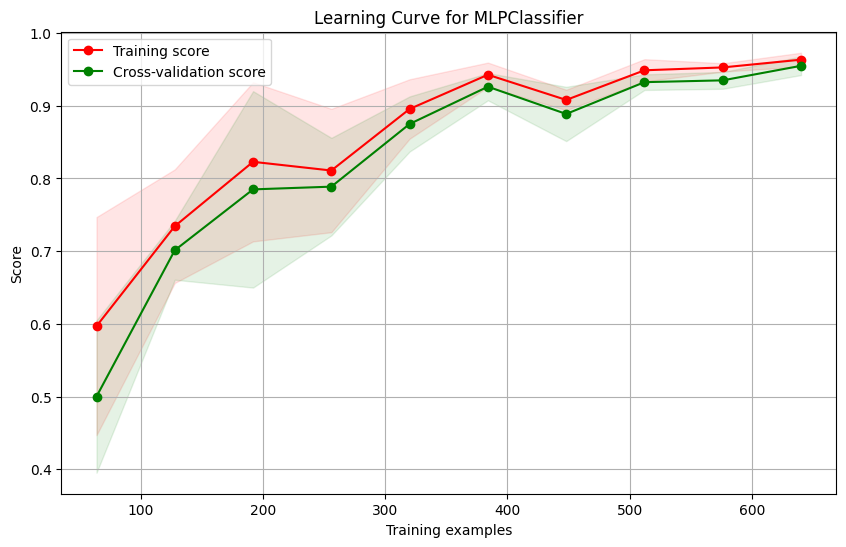

In [79]:
# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    model_mlp, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=2
)
# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for MLPClassifier')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [64]:
from sklearn.ensemble import AdaBoostClassifier

In [65]:
abc = AdaBoostClassifier(n_estimators=10,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None,
    base_estimator='deprecated')

In [66]:
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=10)

In [67]:
y_pred_abc = abc.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred_abc))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        82
         Low       0.00      0.00      0.00        55
      Medium       0.53      1.00      0.70        63

    accuracy                           0.73       200
   macro avg       0.51      0.67      0.57       200
weighted avg       0.58      0.72      0.63       200



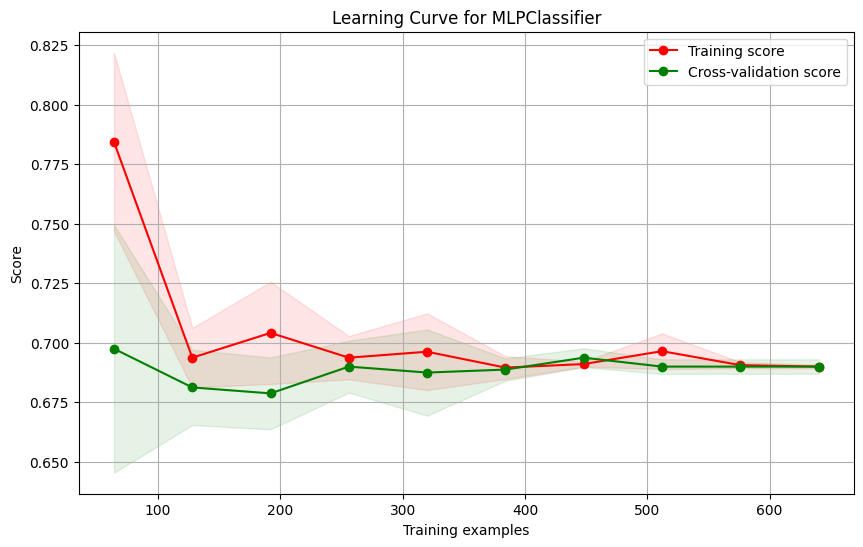

In [71]:
# Generate the learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    abc, X_train, y_train, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=2
)
# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curve for MLPClassifier')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()